# Lab Segmentation 1

In [92]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


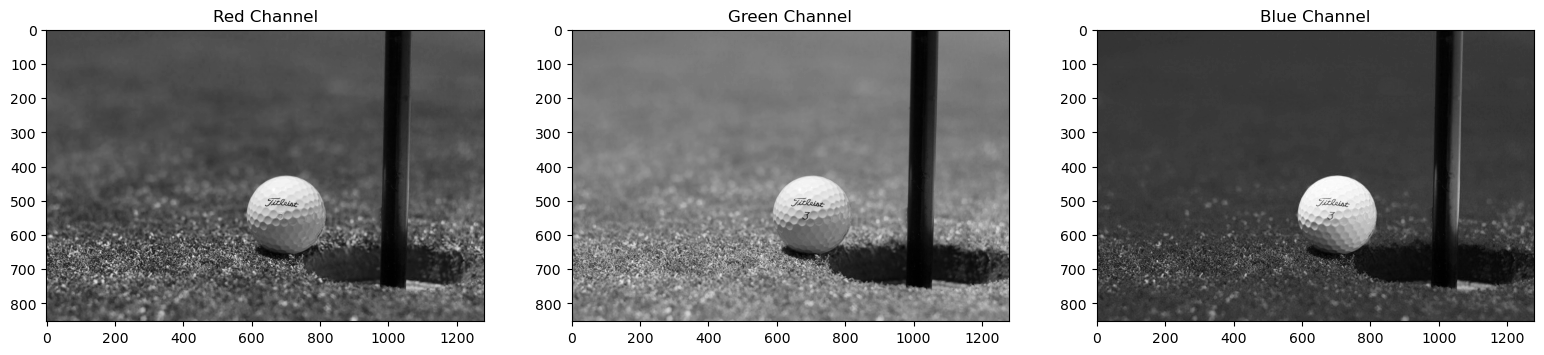

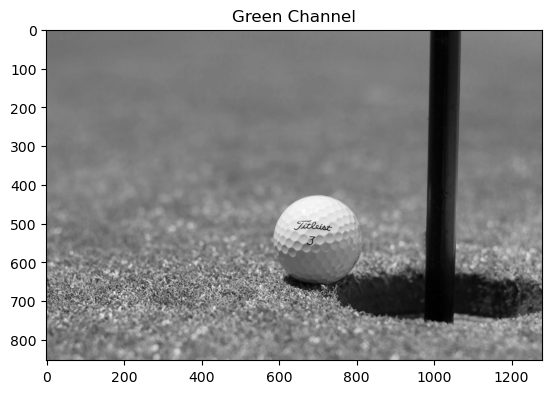

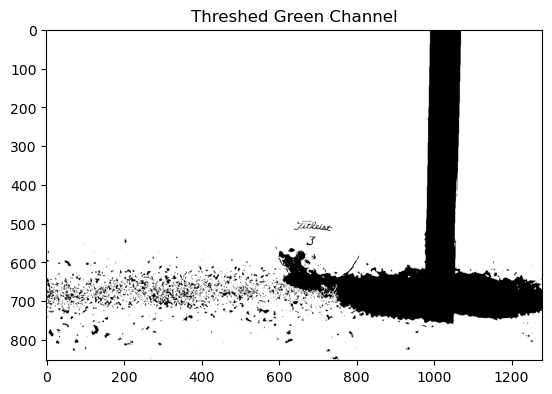

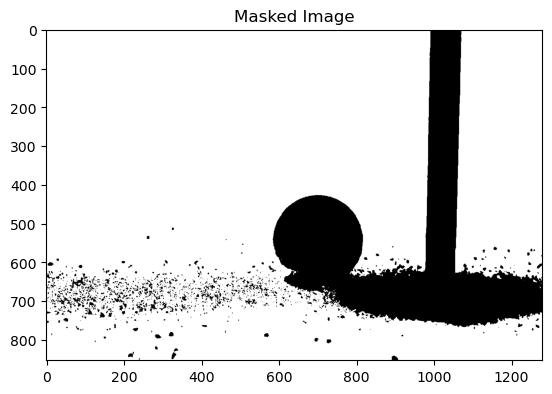

In [93]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf

img = io.imread("imgs/exp1/golf.jpeg")
img = img.astype(float)

# 2- Retrieve the 3 channels of the image(R,G,B) (will be used in the coming steps)
red_channel, green_channel, blue_channel = img[:, :, 0], img[:, :, 1], img[:, :, 2]
show_images(
    [red_channel, green_channel, blue_channel],
    ["Red Channel", "Green Channel", "Blue Channel"],
)

# 3- Visually (not by code) detect the dominating color channel (C) for the background (R, G or B)
show_images([green_channel], ["Green Channel"])

# 4- Draw the dominating channel (r, g or b) threshed by some threshold (to make sure your choice is meaningful)
threshold = 100
threshed_green_channel = (green_channel >= threshold).astype(np.uint8) * 255
show_images([threshed_green_channel], ["Threshed Green Channel"])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels
# have larger values than the other channels with an appropriate threshold
threshold = 25
masked_image = (
    (green_channel > (red_channel + threshold))
    & (green_channel > (blue_channel + threshold))
).astype(np.uint8) * 255


# 6- display the binarized image
show_images([masked_image], ["Masked Image"])

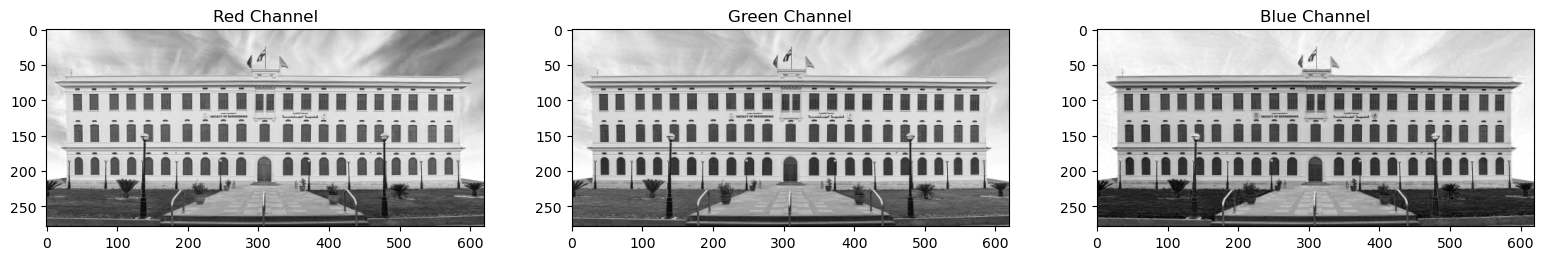

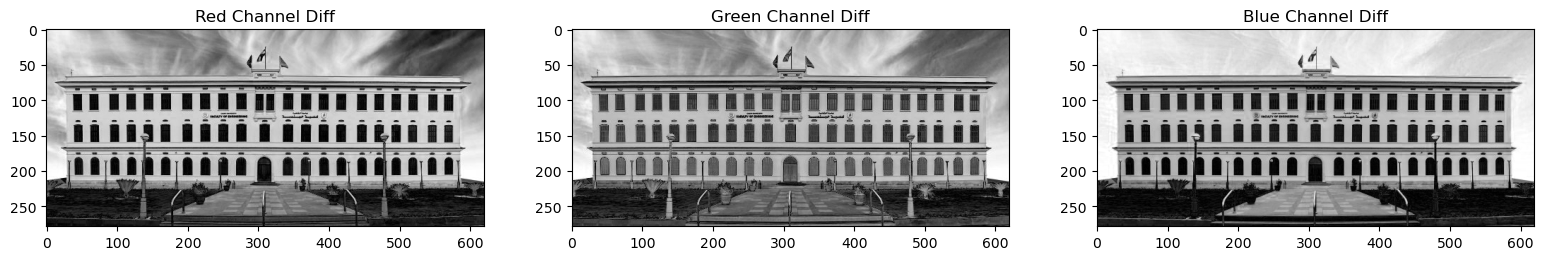

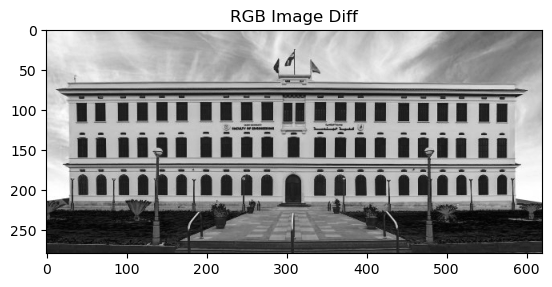

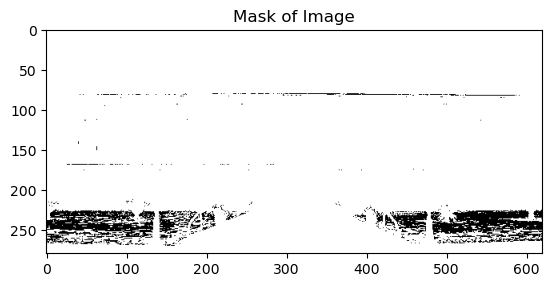

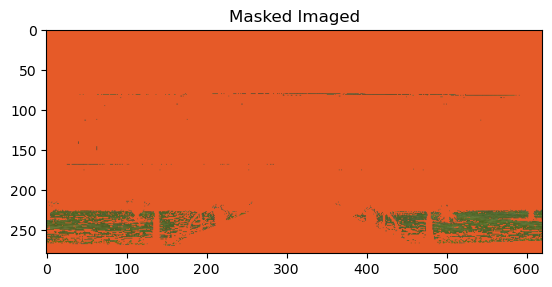

In [94]:
# 1- Get the required RGB color (Using a color picker)
required_color = (91, 112, 45)

# 2- Read image
img = io.imread("imgs/exp2/cufe.png")
img = img.astype(float)

# 3- extract R, G and B channels (as float)
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

show_images(
    [red_channel, green_channel, blue_channel],
    ["Red Channel", "Green Channel", "Blue Channel"],
)


# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)


red_channel_diff = np.abs(red_channel - required_color[0])
green_channel_diff = np.abs(green_channel - required_color[1])
blue_channel_diff = np.abs(blue_channel - required_color[2])

show_images(
    [red_channel_diff, green_channel_diff, blue_channel_diff],
    ["Red Channel Diff", "Green Channel Diff", "Blue Channel Diff"],
)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)


img_diff = red_channel_diff + green_channel_diff + blue_channel_diff
show_images([img_diff], ["RGB Image Diff"])


# 6-  create a mask by threshing the differences
threshold = 45
mask = img_diff > threshold
show_images([mask], ["Mask of Image"])

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
img[mask] = np.array([230, 90, 40])
img = img.astype(np.uint8)


# 8- show the image or save it
show_images([img], ["Masked Imaged"])